In [1]:
import lead_lag as ll
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [2]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data = data.astype(np.float32)
data.index = [datetime(2024, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(data.shape[0])]
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2024-01-01 12:00:00,38.250000,69.059998,62.080002,31.799999,63.009998,28.299999,36.930000,43.230000,42.310001,67.370003,...,74.389999,41.299999,30.049999,39.529999,76.070000,28.620001,72.029999,24.020000,76.029999,27.500000
2024-01-01 11:59:59,38.110001,69.980003,62.389999,31.740000,62.490002,28.230000,37.130001,42.849998,41.849998,68.410004,...,74.690002,41.700001,30.180000,38.930000,75.709999,28.469999,72.110001,24.040001,76.050003,27.540001
2024-01-01 11:59:58,37.900002,69.559998,62.820000,31.570000,62.740002,28.600000,36.570000,42.990002,41.480000,69.839996,...,75.139999,41.139999,30.090000,38.169998,75.559998,28.480000,72.540001,23.760000,75.660004,27.549999
2024-01-01 11:59:57,37.639999,69.389999,63.259998,31.559999,61.849998,28.670000,37.090000,43.230000,41.240002,70.360001,...,75.239998,41.380001,30.080000,38.240002,75.349998,28.590000,73.750000,23.969999,75.709999,27.740000
2024-01-01 11:59:56,37.700001,69.709999,64.040001,31.420000,62.020000,28.420000,37.090000,42.900002,41.400002,69.120003,...,75.330002,41.689999,30.340000,37.849998,75.209999,28.549999,74.320000,24.010000,75.769997,27.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 11:43:25,33.000000,50.720001,49.669998,34.369999,42.130001,24.850000,17.150000,45.520000,31.030001,51.680000,...,77.370003,35.490002,28.299999,27.780001,69.379997,27.570000,67.430000,16.059999,83.250000,27.500000
2024-01-01 11:43:24,32.880001,50.779999,49.549999,34.349998,41.599998,24.840000,16.940001,46.130001,30.770000,53.430000,...,77.480003,35.849998,28.129999,28.000000,69.309998,27.610001,67.959999,16.100000,83.260002,27.410000
2024-01-01 11:43:23,32.590000,51.009998,49.880001,33.720001,41.580002,25.000000,16.879999,45.610001,31.160000,52.480000,...,77.709999,36.259998,27.719999,27.940001,69.199997,27.450001,66.919998,16.219999,83.370003,27.450001
2024-01-01 11:43:22,32.570000,50.730000,50.180000,34.240002,41.520000,25.010000,16.690001,45.750000,31.520000,52.330002,...,77.279999,36.389999,27.740000,27.850000,68.930000,27.290001,66.849998,16.000000,83.320000,27.540001


In [3]:
data[1]

2024-01-01 12:00:00    69.059998
2024-01-01 11:59:59    69.980003
2024-01-01 11:59:58    69.559998
2024-01-01 11:59:57    69.389999
2024-01-01 11:59:56    69.709999
                         ...    
2024-01-01 11:43:25    50.720001
2024-01-01 11:43:24    50.779999
2024-01-01 11:43:23    51.009998
2024-01-01 11:43:22    50.730000
2024-01-01 11:43:21    50.689999
Name: 1, Length: 1000, dtype: float32

In [4]:
ts = pd.Series(
    data=np.cumsum(np.random.uniform(low=-1, high=1, size=1000)),
    index=[datetime(2022, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(1000)]
)
print('lag=', ll.lag(ts, ts.shift(-9), max_lag=10))

lag= 9.0


0 == 0


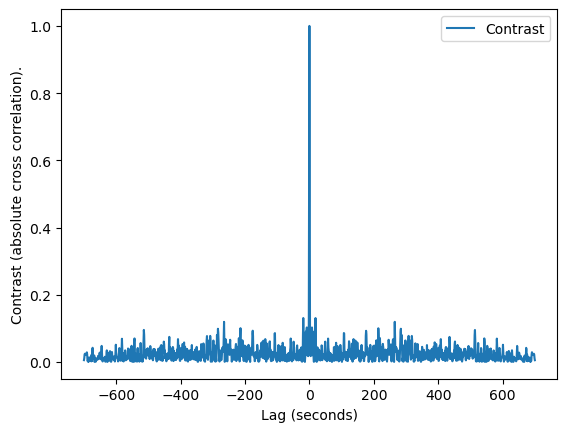

1 == 1


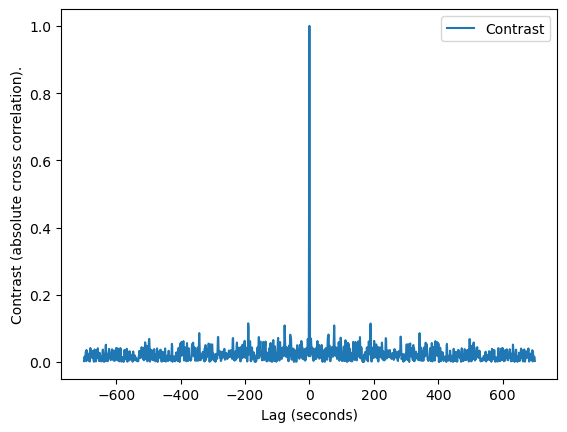

2 == 2


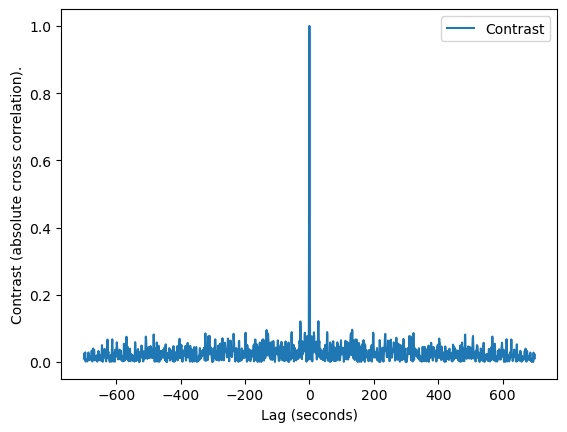

3 == 3


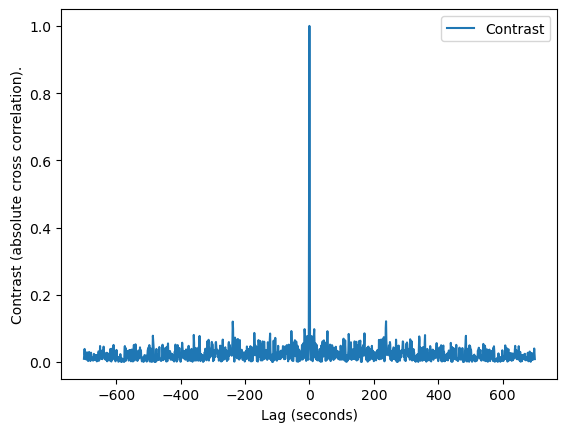

4 == 4


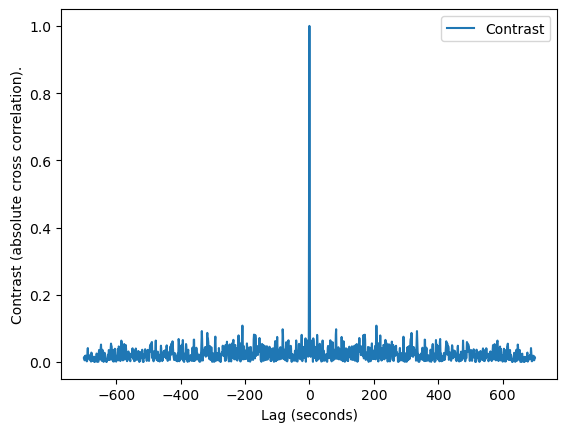

5 == 5


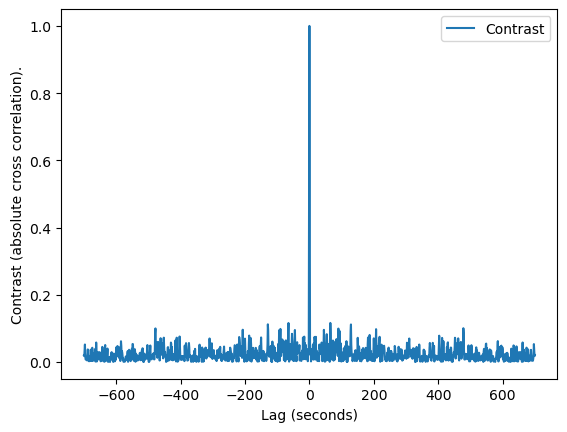

6 == 6


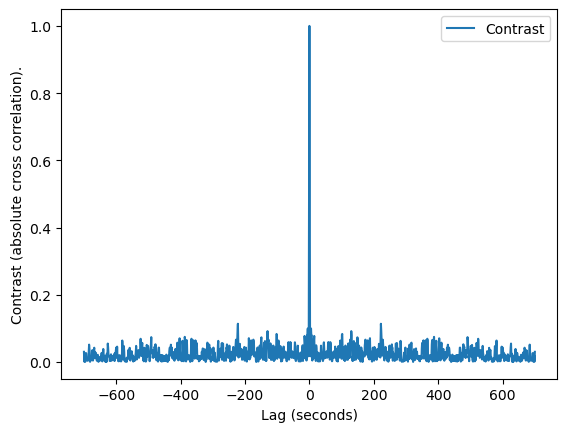

7 == 7


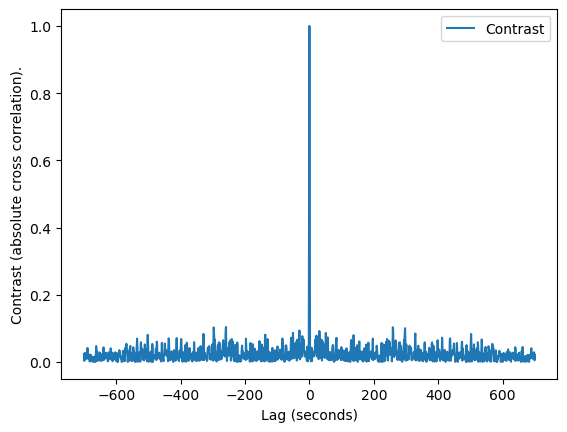

8 == 8


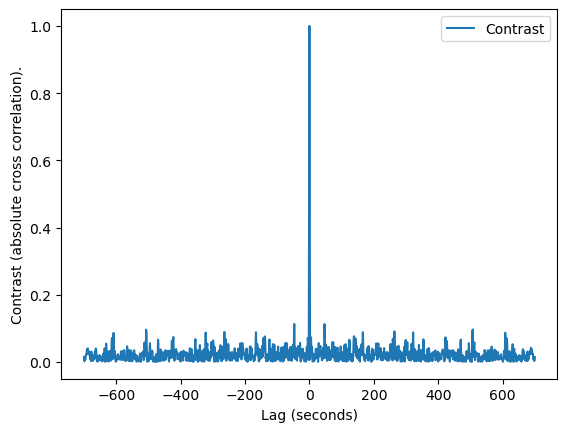

9 == 9


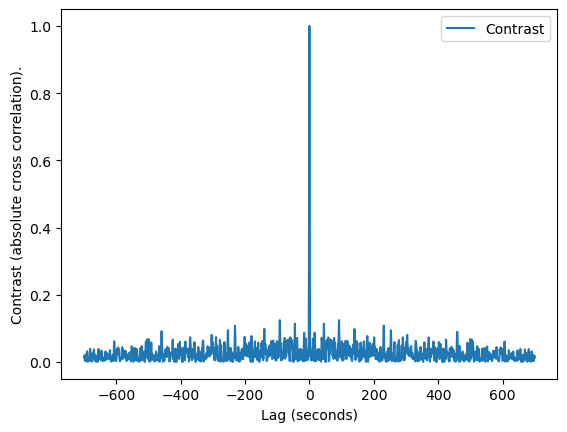

10 == 10


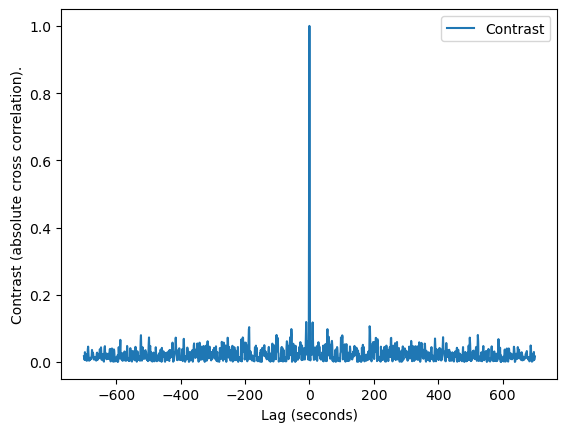

11 == 11


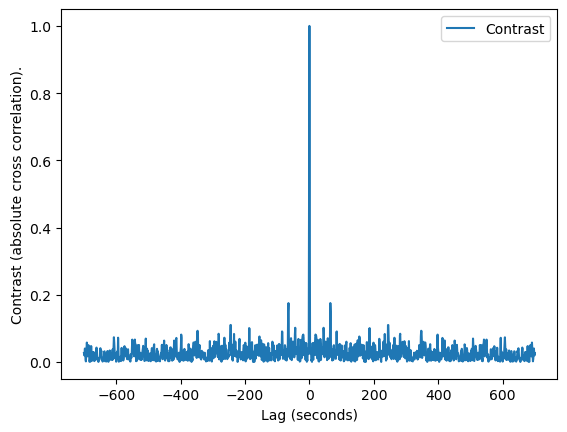

12 == 12


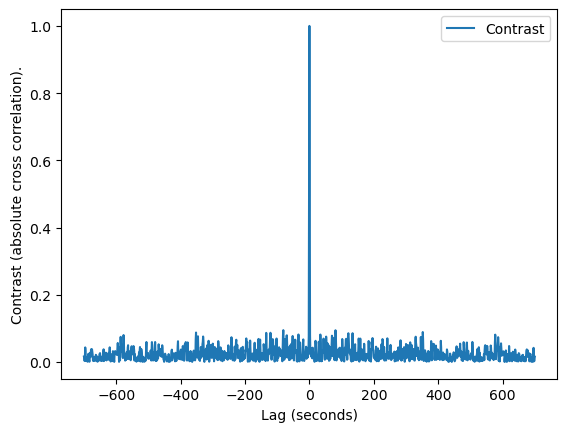

13 == 13


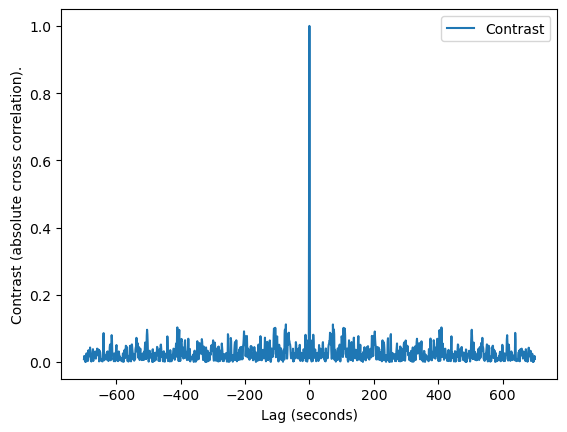

14 == 14


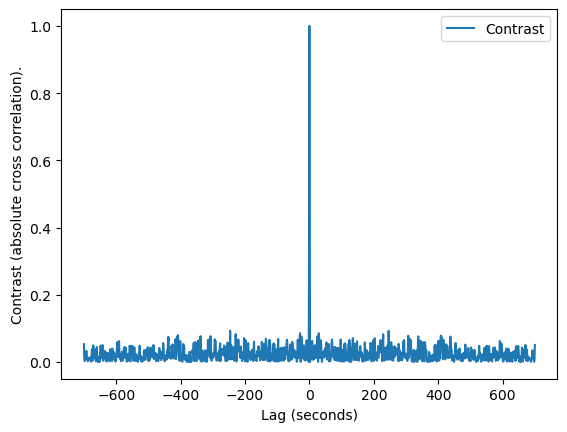

15 == 15


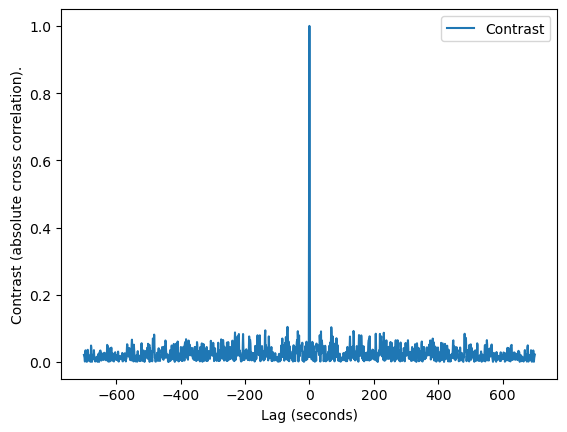

16 == 16


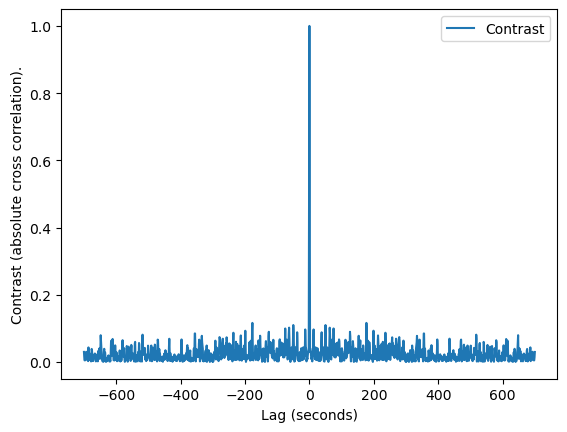

17 == 17


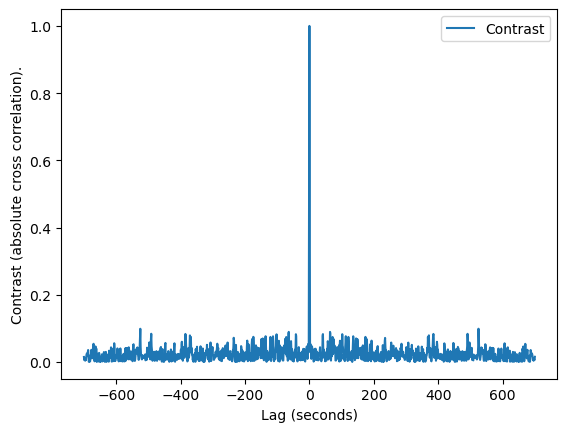

18 == 18


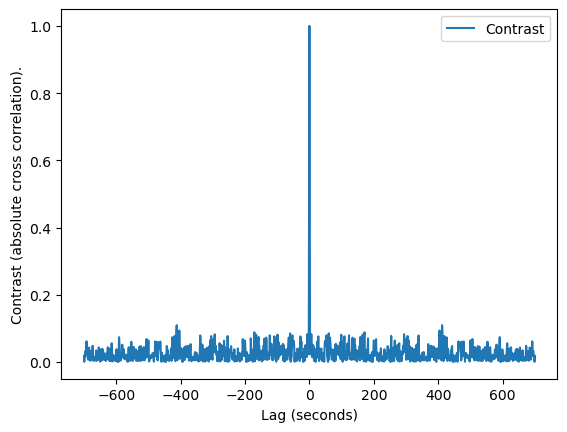

19 == 19


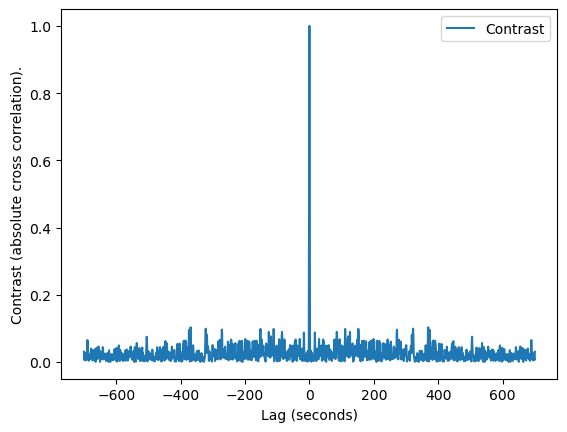

20 == 20


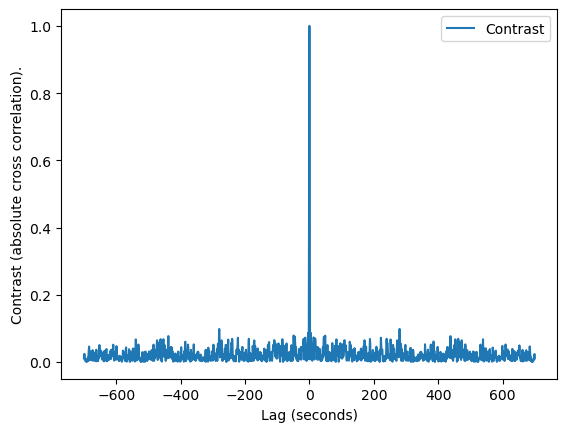

21 == 21


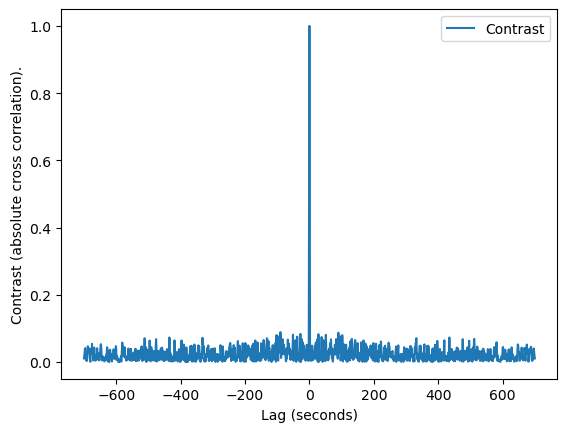

22 == 22


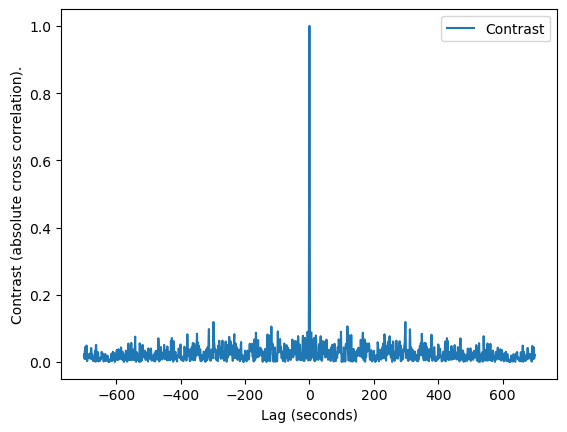

23 == 23


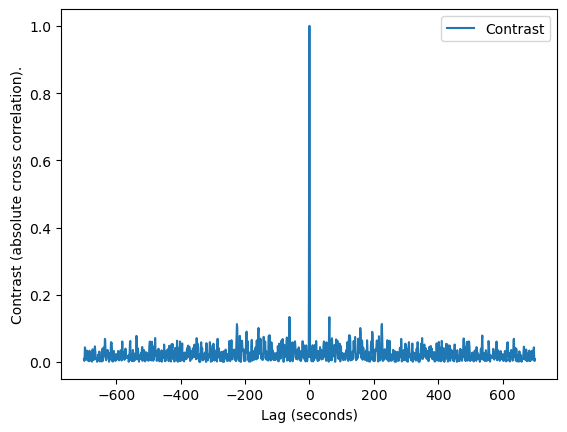

24 == 24


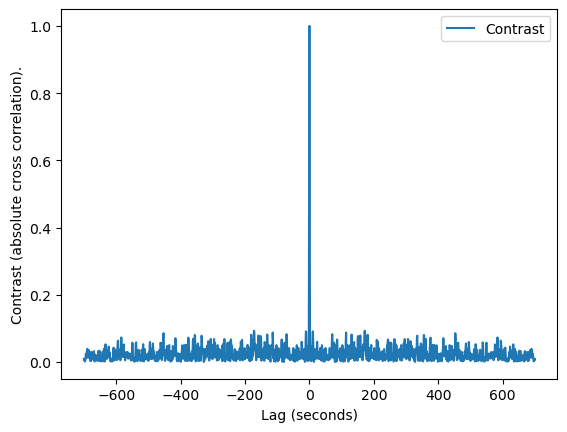

25 == 25


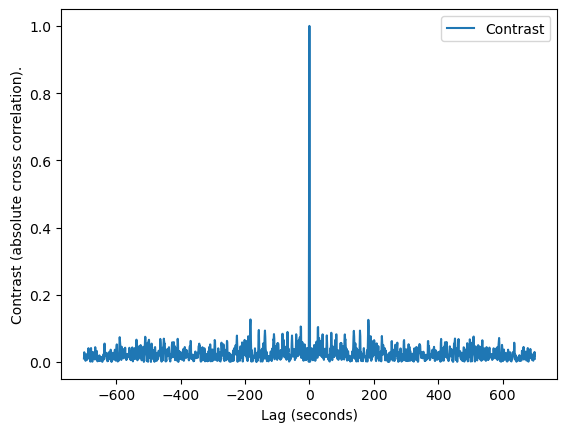

26 == 26


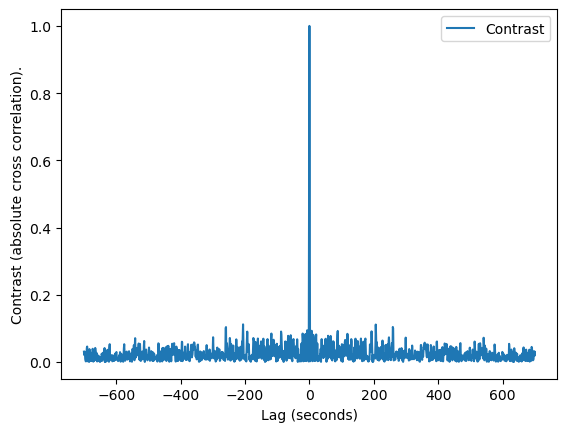

27 == 27


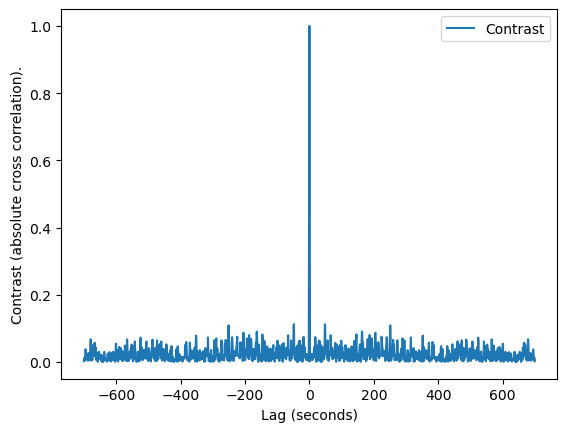

28 == 28


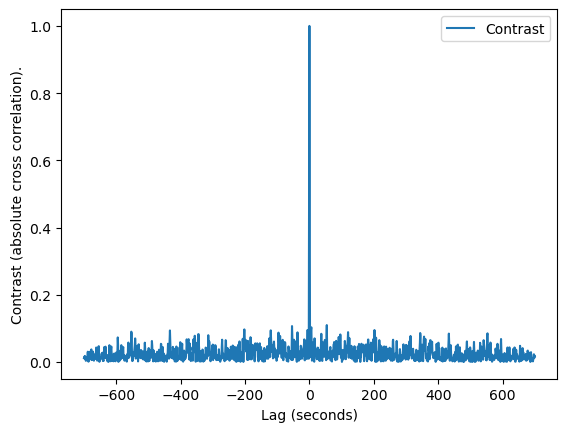

29 == 29


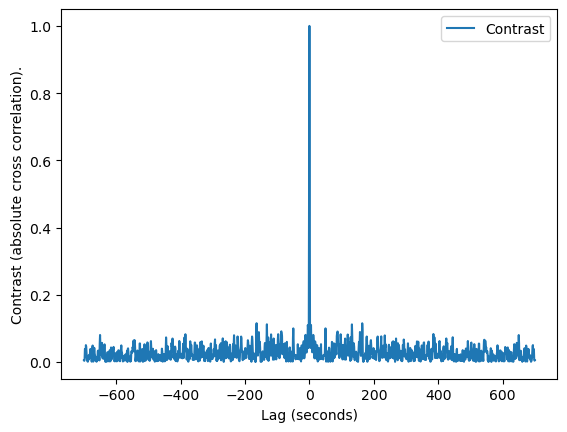

30 == 30


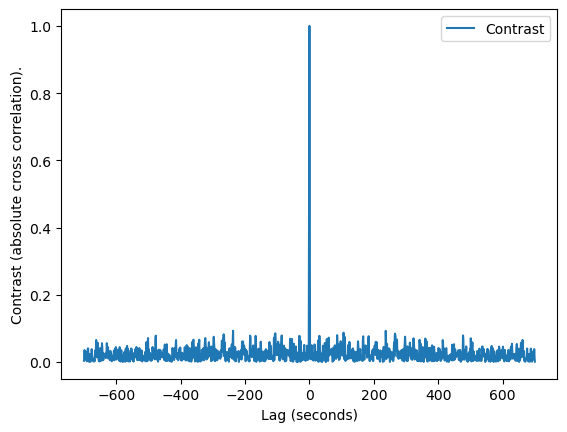

31 == 31


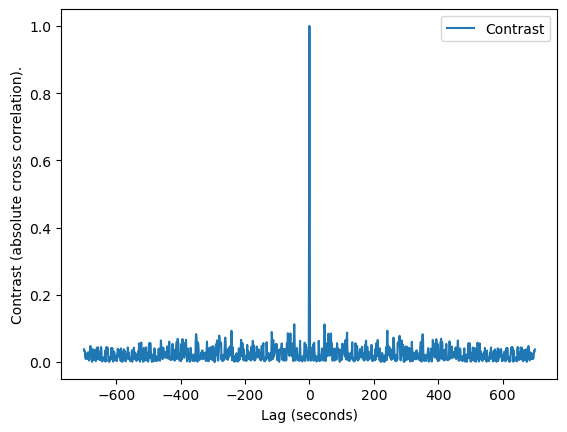

32 == 32


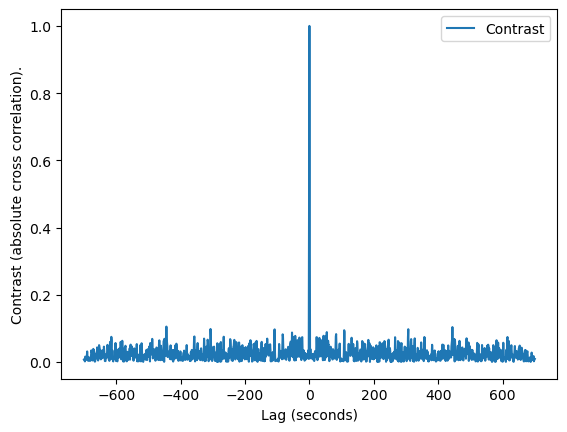

33 == 33


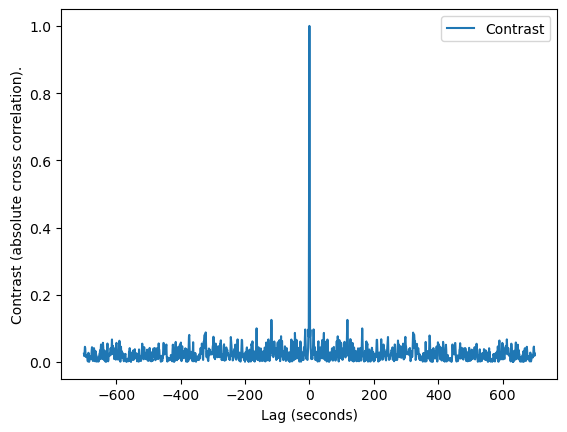

34 == 34


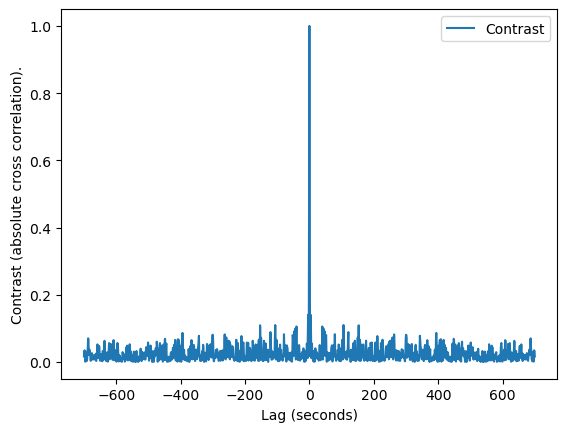

35 == 35


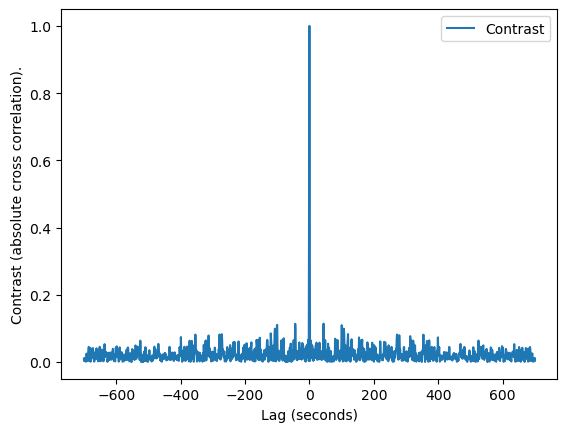

36 == 36


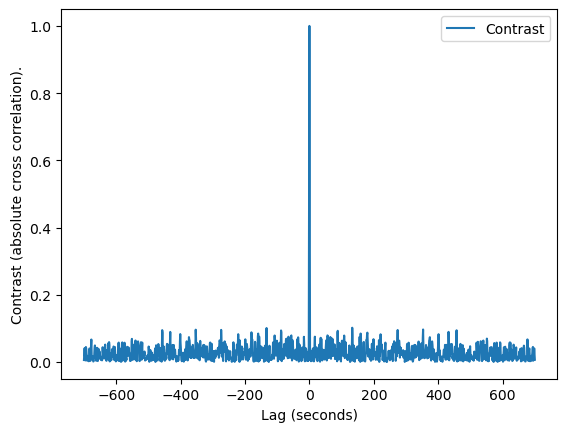

37 == 37


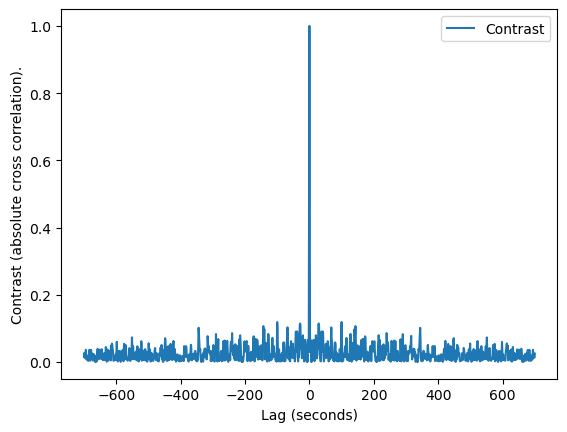

38 == 38


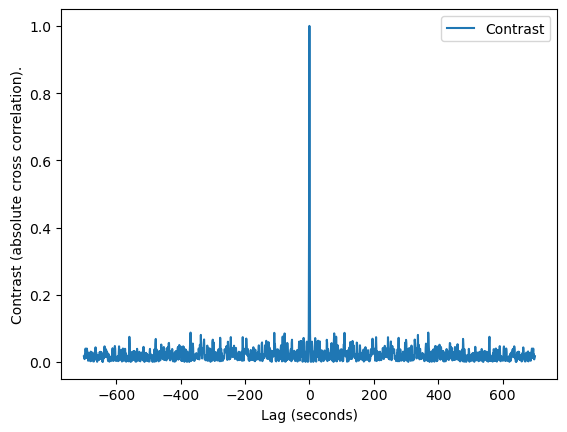

39 == 39


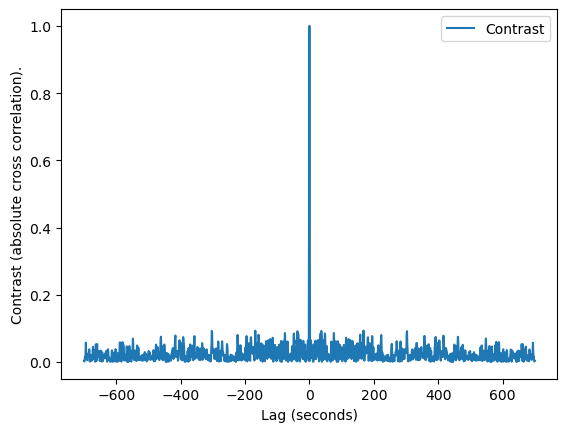

40 == 40


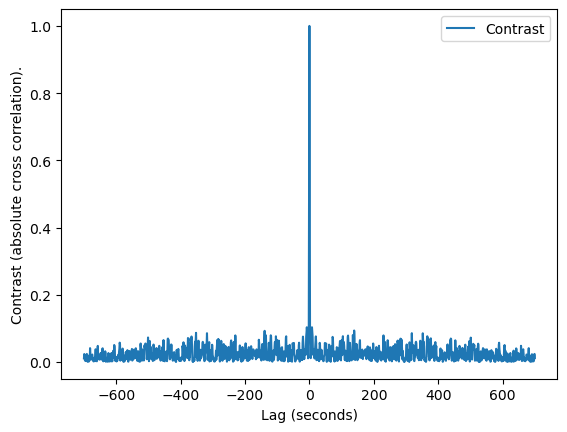

41 == 41


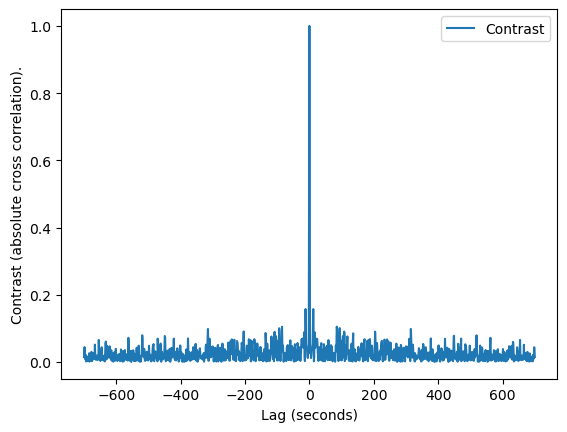

42 == 42


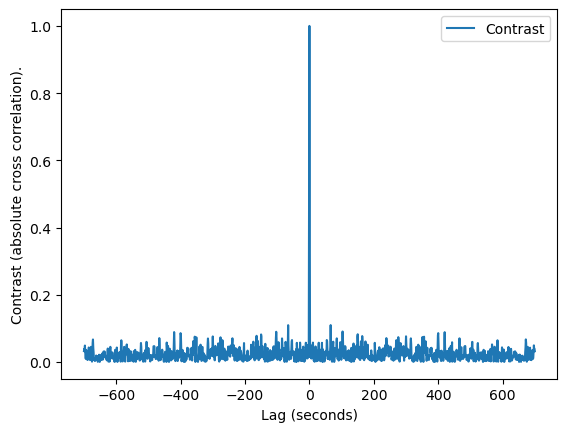

43 == 43


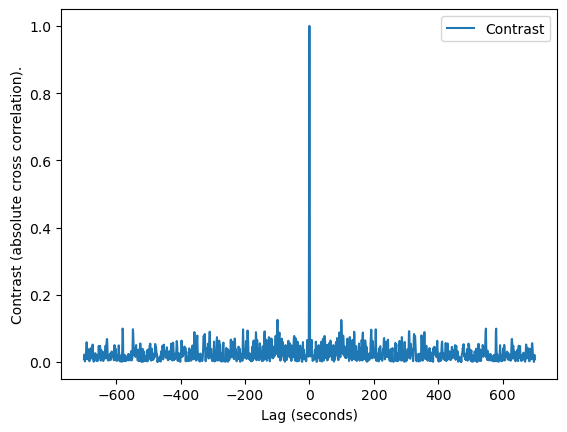

44 == 44


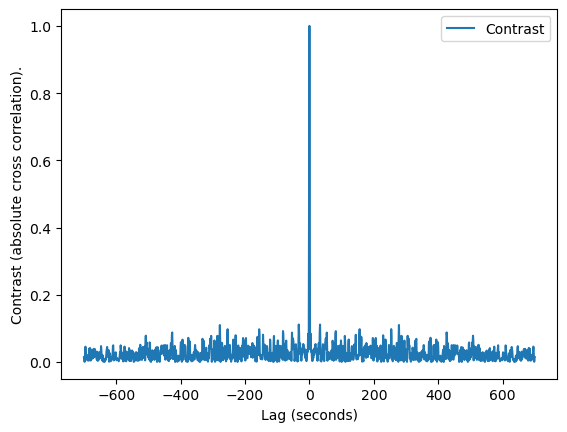

45 == 45


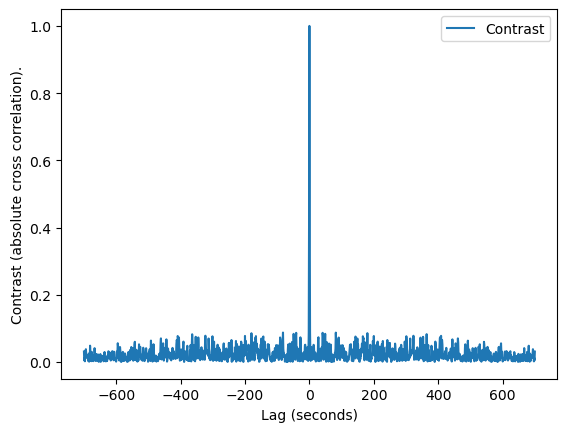

46 == 46


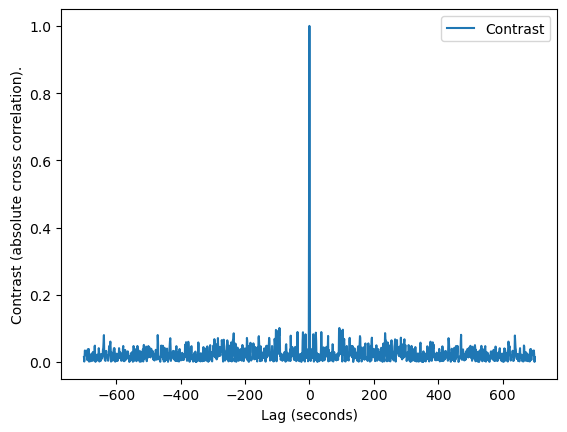

47 == 47


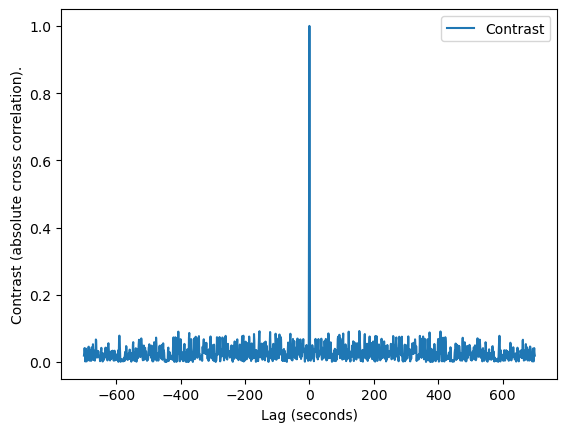

48 == 48


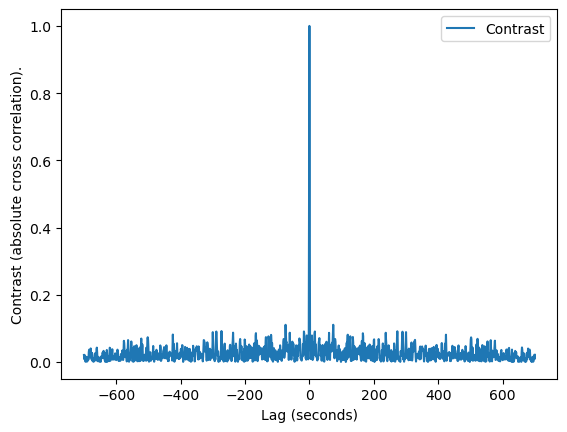

49 == 49


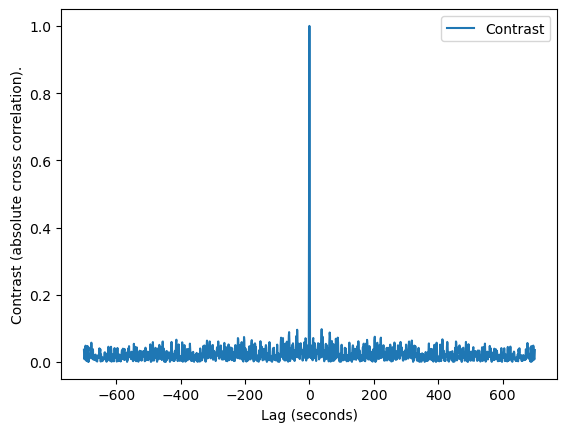

In [6]:
diction = {}
for j in range(50):
    for i in range(j, 50):

        lag = ll.LeadLag(
            ts1=data[i].pct_change(),
            ts2=data[j].pct_change(),
            max_lag=700,  # [-X seconds, +X seconds]
            min_precision=1)
        lag.run_inference()

        if i == j:
            print(i, "==", j)
            lag.plot_results()
            continue
        contrast = max(lag.contrasts)
        diction[(i, j)] = contrast
        if (contrast > 0.3):
            print(i, j)

In [ ]:
with open("lead_lag.txt", "w") as fp:
    fp.write(str(diction))